# Actividad 6
se tomarán las características de un esquema QPSK y se mostrarán los elementos de operación de transmisión mínimos, típicos y máximos de acuerdo a la máscara de transmisión espectral “C”.

## Librerías

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Fuente emisora

### Definición de señal digital

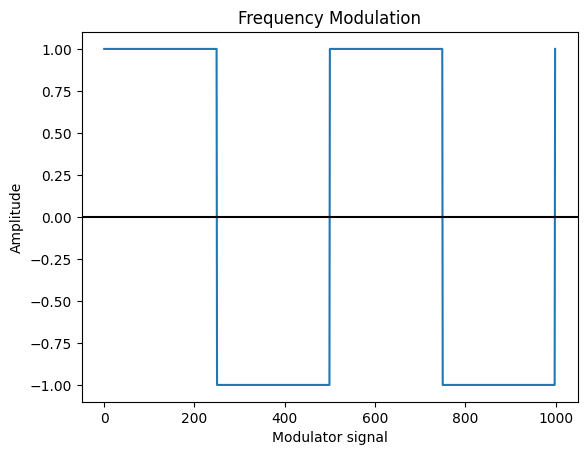

In [13]:
amplitude = 1
modulator_frequency = 1.00 # 1 GHz

time = np.linspace(0, 2, 1000, endpoint=True)
modulator = signal.square(2 * np.pi * modulator_frequency * time)

plt.title('Frequency Modulation')
plt.plot(modulator)
plt.ylabel('Amplitude')
plt.xlabel('Modulator signal')
plt.axhline(y = 0, color = 'k')
plt.show()

### Simulación de PQSK

https://www.gaussianwaves.com/2010/10/qpsk-modulation-and-demodulation-2/

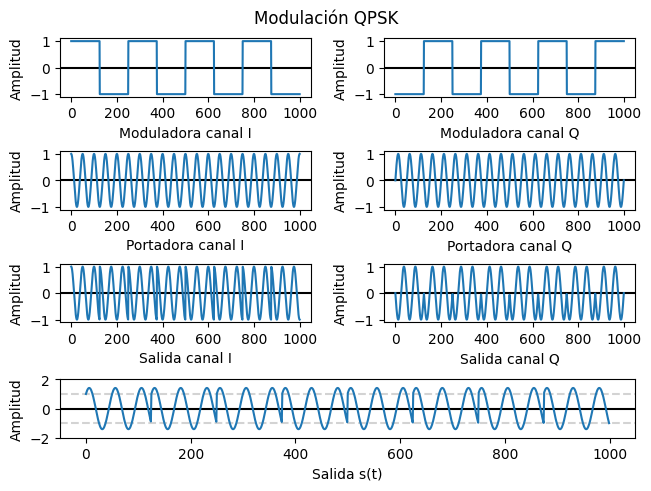

In [6]:
# amplitude = 30 # 30V
amplitude = 1

modulator_frequency = 1000 # 1 GHz
carrier_frequency = 5000 # 5 GHz

time = np.linspace(0, 4, 1000, endpoint=True)

# 2 Señales moduladoras (mensaje)
modulator_I = signal.square(2 * np.pi * modulator_frequency * time)
modulator_Q = signal.square(2 * np.pi * modulator_frequency * time + np.pi)

# 2 Señales moduladas (portadoras/carrier)
carrier_I = np.cos(2.0 * np.pi * carrier_frequency * time)
carrier_Q = np.sin(2.0 * np.pi * carrier_frequency * time)

output_I = np.zeros_like(modulator_I)
output_Q = np.zeros_like(modulator_Q)
output = np.zeros_like(output_I)

for i, t in enumerate(time):
    output_I[i] = amplitude * modulator_I[i] * carrier_I[i]
    output_Q[i] = amplitude * modulator_Q[i] * carrier_Q[i]
    output[i] = output_I[i] - output_Q[i]


fig, axs =  plt.subplot_mosaic([['left1', 'right1'],['left2', 'right2'],['left3', 'right3'],['bottom', 'bottom']],
                               constrained_layout=True)
fig.suptitle('Modulación QPSK')

axs['left1'].axhline(y = 0, color = 'k')
axs['left1'].plot(modulator_I)
axs['left1'].set_ylabel('Amplitud')
axs['left1'].set_xlabel('Moduladora canal I')
axs['left2'].axhline(y = 0, color = 'k')
axs['left2'].plot(carrier_I)
axs['left2'].set_ylabel('Amplitud')
axs['left2'].set_xlabel('Portadora canal I')
axs['left3'].axhline(y = 0, color = 'k')
axs['left3'].plot(output_I)
axs['left3'].set_ylabel('Amplitud')
axs['left3'].set_xlabel('Salida canal I')

axs['right1'].axhline(y = 0, color = 'k')
axs['right1'].plot(modulator_Q)
axs['right1'].set_ylabel('Amplitud')
axs['right1'].set_xlabel('Moduladora canal Q')
axs['right2'].axhline(y = 0, color = 'k')
axs['right2'].plot(carrier_Q)
axs['right2'].set_ylabel('Amplitud')
axs['right2'].set_xlabel('Portadora canal Q')
axs['right3'].axhline(y = 0, color = 'k')
axs['right3'].plot(output_Q)
axs['right3'].set_ylabel('Amplitud')
axs['right3'].set_xlabel('Salida canal Q')

axs['bottom'].axhline(y=0, color='k')
axs['bottom'].axhline(y=-1, linestyle='--', color='lightgray')
axs['bottom'].axhline(y=1, linestyle='--', color='lightgray')
axs['bottom'].plot(output)
axs['bottom'].set_ylim(-2,2)
axs['bottom'].set_ylabel('Amplitud')
axs['bottom'].set_xlabel('Salida s(t)')

plt.show()

In [7]:
def plot_mosaic(modulator_I, modulator_Q, carrier_I, carrier_Q, output_I, output_Q, output):
  fig, axs =  plt.subplot_mosaic([['left1', 'right1'],['left2', 'right2'],['left3', 'right3'],['bottom', 'bottom']],
                               constrained_layout=True)
  fig.suptitle('Modulación QPSK')

  axs['left1'].axhline(y = 0, color = 'k')
  axs['left1'].plot(modulator_I)
  axs['left1'].set_ylabel('Amplitud')
  axs['left1'].set_xlabel('Moduladora canal I')
  axs['left2'].axhline(y = 0, color = 'k')
  axs['left2'].plot(carrier_I)
  axs['left2'].set_ylabel('Amplitud')
  axs['left2'].set_xlabel('Portadora canal I')
  axs['left3'].axhline(y = 0, color = 'k')
  axs['left3'].plot(output_I)
  axs['left3'].set_ylabel('Amplitud')
  axs['left3'].set_xlabel('Salida canal I')

  axs['right1'].axhline(y = 0, color = 'k')
  axs['right1'].plot(modulator_Q)
  axs['right1'].set_ylabel('Amplitud')
  axs['right1'].set_xlabel('Moduladora canal Q')
  axs['right2'].axhline(y = 0, color = 'k')
  axs['right2'].plot(carrier_Q)
  axs['right2'].set_ylabel('Amplitud')
  axs['right2'].set_xlabel('Portadora canal Q')
  axs['right3'].axhline(y = 0, color = 'k')
  axs['right3'].plot(output_Q)
  axs['right3'].set_ylabel('Amplitud')
  axs['right3'].set_xlabel('Salida canal Q')

  axs['bottom'].axhline(y=0, color='k')
  axs['bottom'].axhline(y=-1, linestyle='--', color='lightgray')
  axs['bottom'].axhline(y=1, linestyle='--', color='lightgray')
  axs['bottom'].plot(output)
  axs['bottom'].set_ylim(-2,2)
  axs['bottom'].set_ylabel('Amplitud')
  axs['bottom'].set_xlabel('Salida s(t)')

plt.show()

### Definiendo trama de datos binaria a transmitir

In [8]:
def demultiplexor(data):
  signal_I = []
  signal_Q = []

  for i, bit in enumerate(data):
    if (i % 2):
      signal_Q.append(bit)
    else:
      signal_I.append(bit)
  return signal_I, signal_Q

In [13]:
data = [1,1,0,0,0,1,1,0]

signal_I, signal_Q = demultiplexor(data)

print(signal_I)
print(signal_Q)

[1, 0, 0, 1]
[1, 0, 1, 0]


In [14]:
time = np.linspace(0, 3.9, 1000, endpoint=True)
modulator_I = np.zeros_like(time)
modulator_Q = np.zeros_like(time)
for i, t in enumerate(time):
  signal_idx = int(t)
  modulator_I[i] = signal_I[signal_idx]
  modulator_Q[i] = signal_Q[signal_idx]


In [15]:
time = np.linspace(0, 4, 1000, endpoint=True)
carrier_I = np.cos(2.0 * np.pi * carrier_frequency * time)
carrier_Q = np.sin(2.0 * np.pi * carrier_frequency * time)

output_I = np.zeros_like(modulator_I)
output_Q = np.zeros_like(modulator_Q)
output = np.zeros_like(output_I)

for i, t in enumerate(time):
    output_I[i] = amplitude * modulator_I[i] * carrier_I[i]
    output_Q[i] = amplitude * modulator_Q[i] * carrier_Q[i]
    output[i] = output_I[i] - output_Q[i]

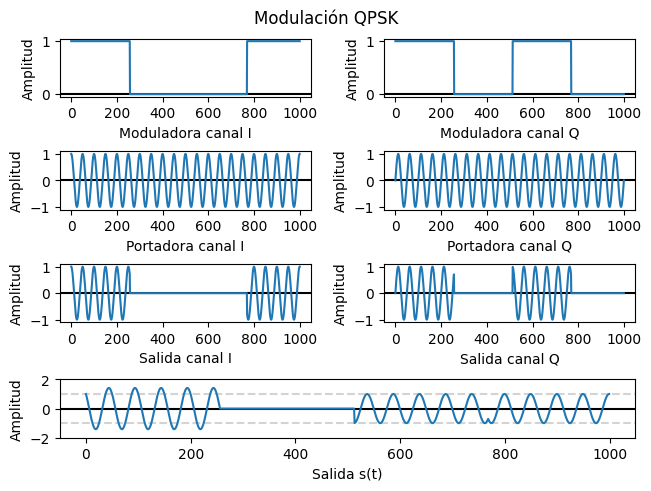

In [16]:
plot_mosaic(modulator_I, modulator_Q, carrier_I, carrier_Q, output_I, output_Q, output)

## Selección de atenuación de la señal en función del tiempo y de la frecuencia

De acuerdo con el estándar de IEEE 802.11 para una señal OFDM de 10 MHz la tasa de atenuación varía entre -85 dBm a 3Mbps y -68 dBm a 27 Mbps.

### Señal despues de recorrer 15 m

Para una tasa de atenuación de -85 dB/m, la atenuación después de recorrer 15 m es la siguiente:

atenuación = -85 dB/m * 15 m

atenuación = -1275

Si despejamos de la fórmula:

atenuacion = 20 * log10(Vo/Vi)

10^(-1275dB/20) = Vo/Vi

Vo = 10^(-1275dB/20) * Vi

Vo = 10^(-63.75) * Vi

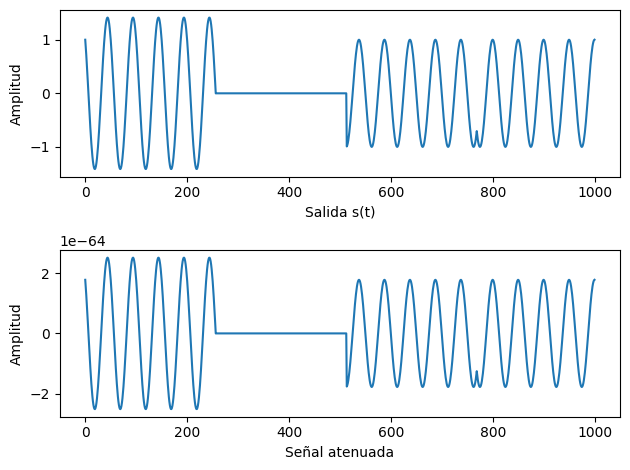

In [18]:
log_base = 10

attenuated_signal = np.power(log_base, -63.75) * output

plt.subplot(2, 1, 1)
plt.plot(output)
plt.ylabel('Amplitud')
plt.xlabel('Salida s(t)')
plt.subplot(2, 1, 2)
plt.plot(attenuated_signal)
plt.ylabel('Amplitud')
plt.xlabel('Señal atenuada')
plt.tight_layout()
plt.show()


Para una tasa de atenuación de -68 dB/m, la atenuación después de recorrer 15 m

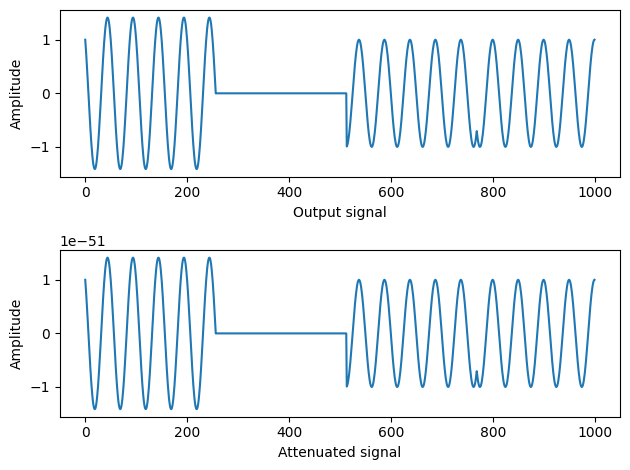

In [19]:
log_base = 10
tasa_atenuacion = -68 # dB/m
distancia = 15 # m


attenuated_signal = np.power(log_base, (tasa_atenuacion*distancia)/20) * output

plt.subplot(2, 1, 1)
plt.plot(output)
plt.ylabel('Amplitude')
plt.xlabel('Output signal')
plt.subplot(2, 1, 2)
plt.plot(attenuated_signal)
plt.ylabel('Amplitude')
plt.xlabel('Attenuated signal')
plt.tight_layout()
plt.show()